<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Projetos de An√°lise de Dados com Linguagem Python</font>
# <font color='blue'>Projeto 2 - T√©cnicas de Pr√©-Processamento Para An√°lise de Dados</font>

## Pacotes Python Usados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
#biblioteca para valores ausentes
!pip install -q missingno 

In [3]:
# Imports
#para manipula√ß√£o de dados
import pandas as pd 
import numpy as np
#para visualiza√ß√£o de dados
import matplotlib.pyplot as plt
import seaborn as sns
#para valores ausentes
import missingno as msno

In [4]:
%reload_ext watermark
%watermark -a "MF"

Author: MF



## Carregando os Dados

In [5]:
# Carrega o dataset
dados = pd.read_csv("dataset.csv")

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
# Shape
dados.shape

(500, 5)

In [8]:
# Colunas
dados.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [9]:
# 5 primeiras linhas do dataset
dados.head()

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico
0     58  30404.959339  Masculino        M√©dio                      56.0
1     48  20886.502401   Feminino        M√©dio                       NaN
2     34  15959.388748  Masculino        M√©dio                      57.0
3     62  28534.995327      Outro     Superior                      68.0
4     27  10553.176215      Outro  Fundamental                      44.0

In [10]:
# Amostra dos dados
dados.sample(100)

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico
89      20  10916.710029      Outro  Fundamental                      39.0
218     57  25538.030379  Masculino        M√©dio                      46.0
130     24  17896.485920      Outro     Superior                      78.0
314     46           NaN  Masculino        M√©dio                      47.0
208     38  13813.769228      Outro  Fundamental                      32.0
..     ...           ...        ...          ...                       ...
126     56  29661.570060  Masculino  Fundamental                      37.0
70      33  18113.592802  Masculino        M√©dio                      73.0
322     24           NaN   Feminino     Superior                      68.0
341     52  31470.957592      Outro  Fundamental                      56.0
117     56  31114.249662      Outro  Fundamental                      33.0

[100 rows x 5 columns]

In [11]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


## An√°lise Explorat√≥ria de Dados

Esta etapa do processo ajuda a compreender como os dados est√£o organizados e os eventuais problemas.

In [12]:
# Descrevendo os dados n√£o num√©ricos
dados.describe(include = object) #include = object para dados n√£o num√©ricos

Genero Escolaridade
count        500          500
unique         3            3
top     Feminino        M√©dio
freq         169          274

In [13]:
# Descrevendo os dados num√©ricos
dados.describe()

Idade       Salario  Score_Exame_Psicotecnico
count  500.000000    450.000000                470.000000
mean    42.848000  21252.781137                 61.565957
std     13.189725   8322.933018                 17.662523
min     20.000000  -3254.849042                 20.000000
25%     31.750000  15139.019963                 48.000000
50%     44.000000  21681.102602                 61.000000
75%     54.000000  27379.540314                 74.000000
max     65.000000  40845.107626                100.000000

In [14]:
print(dados.isnull().sum())

Idade                        0
Salario                     50
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


### Visualizando a Distribui√ß√£o das Vari√°veis Quantitativas

In [15]:
dados.head()

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico
0     58  30404.959339  Masculino        M√©dio                      56.0
1     48  20886.502401   Feminino        M√©dio                       NaN
2     34  15959.388748  Masculino        M√©dio                      57.0
3     62  28534.995327      Outro     Superior                      68.0
4     27  10553.176215      Outro  Fundamental                      44.0

In [16]:
# Extraindo as colunas num√©ricas com List Comprehension
colunas_selecionadas = [list(dados.columns.values)[i] for i in [0, 1, 4]]

In [17]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

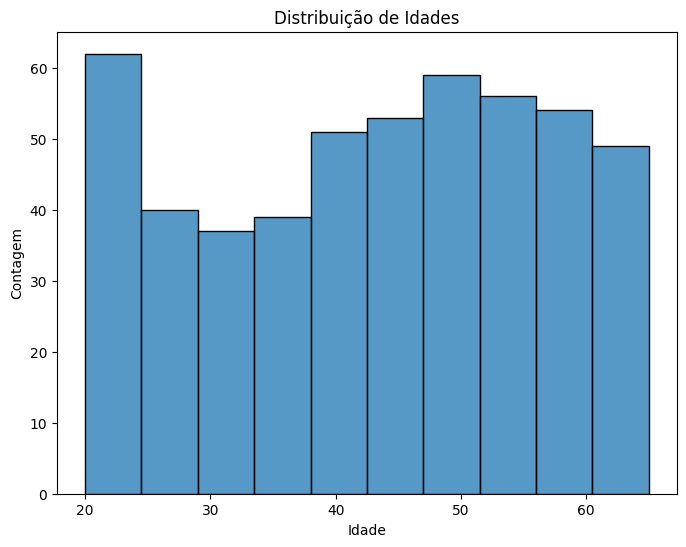

In [18]:
# Distribui√ß√£o de Idades
plt.figure(figsize = (8, 6))
sns.histplot(dados['Idade'])
plt.title('Distribui√ß√£o de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

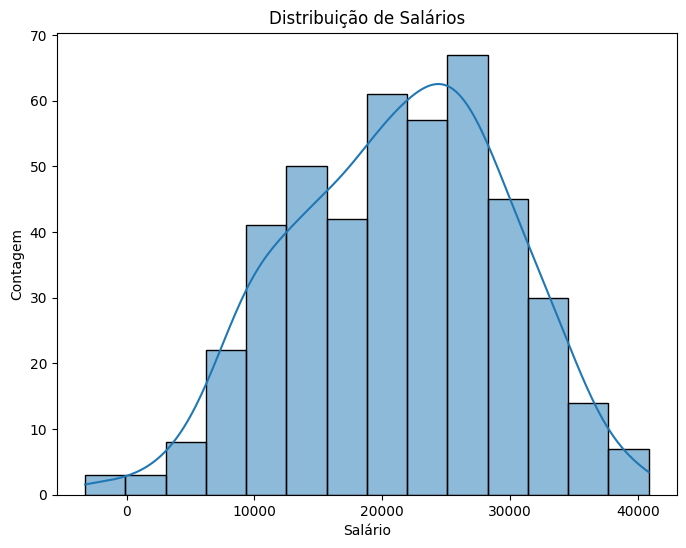

In [19]:
# Distribui√ß√£o de Sal√°rios
plt.figure(figsize = (8, 6))
sns.histplot(dados['Salario'], kde = True) #to add the distribuition curve
plt.title('Distribui√ß√£o de Sal√°rios')
plt.xlabel('Sal√°rio')
plt.ylabel('Contagem')
plt.show()

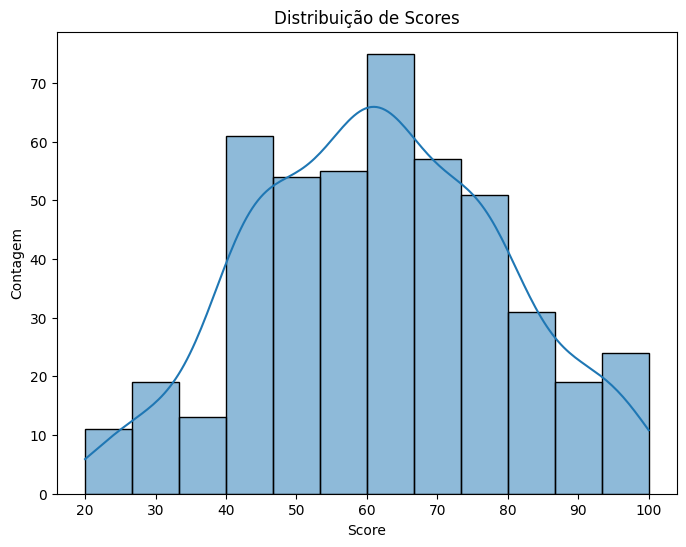

In [20]:
# Distribui√ß√£o de Scores
plt.figure(figsize = (8, 6))
sns.histplot(dados['Score_Exame_Psicotecnico'], kde = True) #to add the distribuition curve
plt.title('Distribui√ß√£o de Scores')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

### Visualizando a Distribui√ß√£o das Vari√°veis Qualitativas

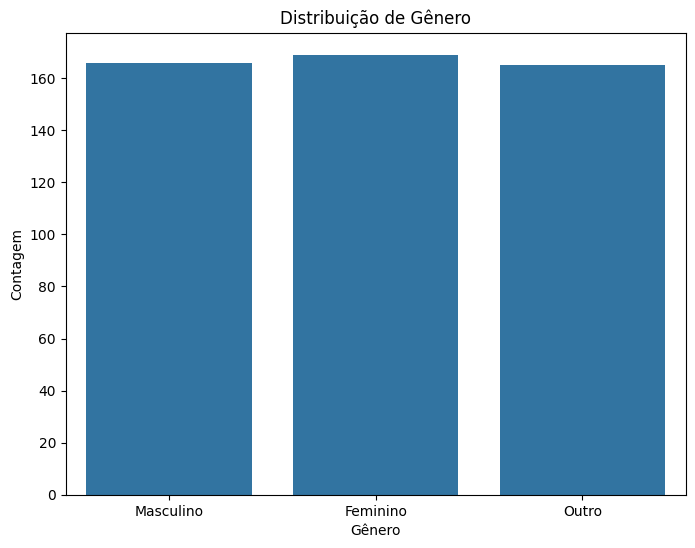

In [21]:
# Distribui√ß√£o de G√™nero
plt.figure(figsize = (8, 6))
sns.countplot(data = dados, x = 'Genero')
plt.title('Distribui√ß√£o de G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('Contagem')
plt.show()

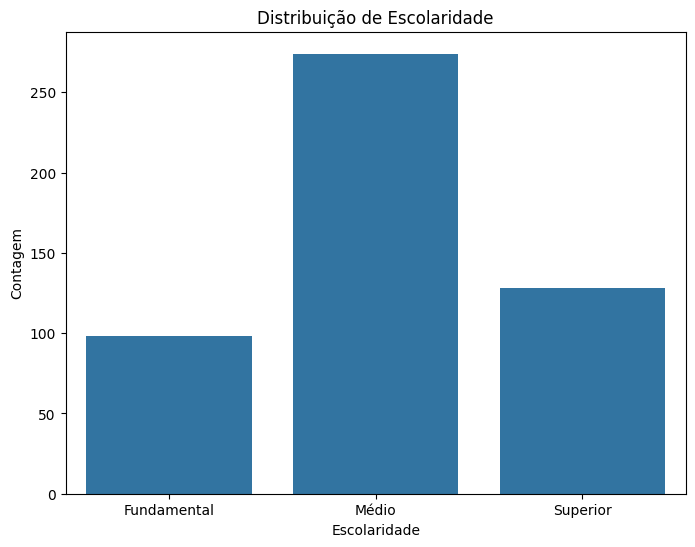

In [22]:
# Distribui√ß√£o de Escolaridade
plt.figure(figsize = (8, 6))
sns.countplot(data = dados, x = 'Escolaridade', order = ['Fundamental', 'M√©dio', 'Superior'])
plt.title('Distribui√ß√£o de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

### Correla√ß√£o Entre Vari√°veis Quantitativas

A correla√ß√£o entre as vari√°veis quantitativas nos permite entender como uma vari√°vel se move em rela√ß√£o √† outra. O m√©todo mais comum para calcular a correla√ß√£o entre vari√°veis √© usando o coeficiente de correla√ß√£o de Pearson, que varia entre -1 e 1. 

- Quanto mais pr√≥ximo de 1, mais forte √© a correla√ß√£o positiva.
- Quanto mais pr√≥ximo de -1, mais forte √© a correla√ß√£o negativa. 
- Pr√≥ximo de 0 indica pouca ou nenhuma correla√ß√£o.

Vamos calcular a matriz de correla√ß√£o e depois visualiz√°-la em um mapa de calor:

In [23]:
# Calculando a matriz de correla√ß√£o apenas para as vari√°veis quantitativas
correlation_matrix = dados[  ['Idade', 'Salario', 'Score_Exame_Psicotecnico']  ].corr()

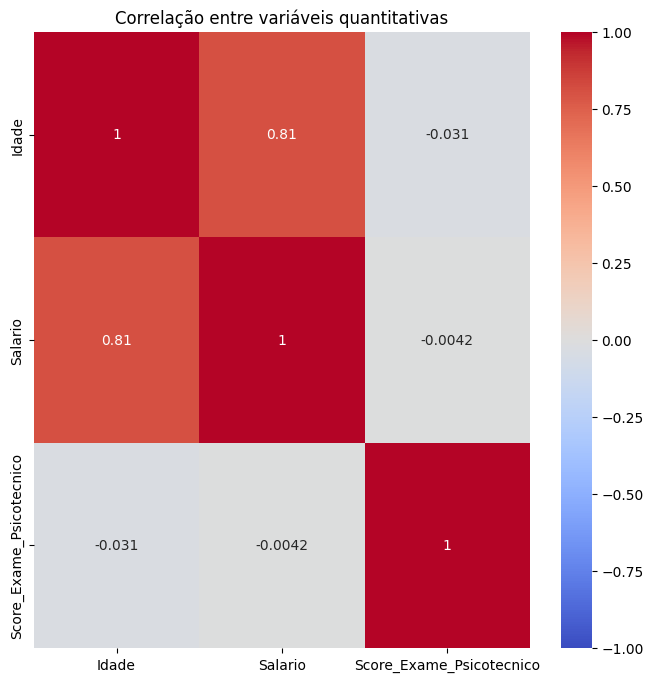

In [24]:
# Visualizando a matriz de correla√ß√£o com um heatmap
plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correla√ß√£o entre vari√°veis quantitativas')
plt.show()

### Associa√ß√£o Entre Vari√°veis Qualitativas

Para vari√°veis categ√≥ricas usamos associa√ß√£o (e n√£o correla√ß√£o) para analisar a rela√ß√£o entre as vari√°veis. Vejamos algumas t√©cnicas de associa√ß√£o.

**Tabela de Conting√™ncia**: √â basicamente uma tabela cruzada (crosstab) que mostra a frequ√™ncia (ou contagem) de observa√ß√µes em cada categoria para duas vari√°veis.

In [25]:
# Tabela de Conting√™ncia
tabela_contingencia = pd.crosstab(dados['Genero'], dados['Escolaridade'])

In [26]:
print(tabela_contingencia)

Escolaridade  Fundamental  M√©dio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


**Teste do Qui-quadrado (œá¬≤)**: √â usado para testar a independ√™ncia entre duas vari√°veis categ√≥ricas. 

O Teste do Qui-quadrado (chi-quadrado) √© uma t√©cnica estat√≠stica que √© usada para determinar se h√° uma associa√ß√£o significativa entre duas vari√°veis categ√≥ricas em um conjunto de dados. Existem v√°rias hip√≥teses associadas ao teste do qui-quadrado:

Hip√≥tese Nula (H0): A hip√≥tese nula afirma que n√£o h√° associa√ß√£o significativa entre as duas vari√°veis categ√≥ricas no conjunto de dados. Em outras palavras, as duas vari√°veis s√£o independentes uma da outra.

Hip√≥tese Alternativa (H1 ou Ha): A hip√≥tese alternativa √© a nega√ß√£o da hip√≥tese nula. Ela sugere que h√° uma associa√ß√£o significativa entre as duas vari√°veis categ√≥ricas no conjunto de dados. Em termos simples, as duas vari√°veis n√£o s√£o independentes.

Aplicamos o teste e analisamos o valor-p. Se o valor-p for menor que um n√≠vel de signific√¢ncia (geralmente 0,05), podemos rejeitar a hip√≥tese nula de que as vari√°veis s√£o independentes.

In [27]:
# Carrega a fun√ß√£o chi2_contingency
from scipy.stats import chi2_contingency

In [28]:
# Aplica a fun√ß√£o chi2_contingency
chi2, p, _, _ = chi2_contingency(tabela_contingencia)

In [29]:
#resultado 0,83 √© maior do que 0,05 falhamos em rejeitar H0 ent√£o n√£o uma uma associa√ß√£o entre as duas variavies
print(f"Valor-p do teste Qui-quadrado: {p:.4f}") 

Valor-p do teste Qui-quadrado: 0.8300


In [30]:
a, b, c, d = chi2_contingency(tabela_contingencia)
print(a)
print((b))
print(c)
print(d)

1.4809377393100673
0.8300126582461018
4
[[33.124 92.612 43.264]
 [32.536 90.968 42.496]
 [32.34  90.42  42.24 ]]



Nesse caso falhamos em rejeitar a H0. Provavelmente as duas vari√°veis s√£o independentes uma da outra.

**Coeficiente de Conting√™ncia de Cram√©r (V)**: Mede a for√ßa da associa√ß√£o entre duas vari√°veis nominais. Seu valor varia de 0 (sem associa√ß√£o) a 1 (associa√ß√£o perfeita). √â baseado no valor do qui-quadrado.

In [31]:
# Calculando o Coeficiente de Conting√™ncia de Cram√©r
#correla√ß√£o entre quantidades QUALITATIVAS

n = tabela_contingencia.sum().sum()
phi2 = chi2 / n
r, k = tabela_contingencia.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Coeficiente de Cram√©r V: {cramers_v:.4f}")

Coeficiente de Cram√©r V: 0.0385


Provavelmente n√£o h√° associa√ß√£o entre as vari√°veis.

## T√©cnicas de Pr√©-Processamento de Dados

At√© aqui analisamos e exploramos os dados. Usamos o resultado desse trabalho para decidir o tipo de processamento que devemos realizar. Come√ßaremos pelo tratamento de valores ausentes, duplicatas e valores negativos.

### Valores Duplicados

In [32]:
dados.sample(10)

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico
417     61  33530.049757   Feminino  Fundamental                      59.0
108     47  14934.327355  Masculino        M√©dio                      60.0
482     47  27038.759677  Masculino        M√©dio                      48.0
449     33  21413.454920      Outro        M√©dio                      77.0
360     61  29345.327349      Outro        M√©dio                      77.0
179     58  32787.538550  Masculino  Fundamental                      23.0
400     62  34554.799841  Masculino        M√©dio                      57.0
268     38  16561.968880   Feminino     Superior                       NaN
86      48  34765.912288   Feminino        M√©dio                      53.0
47      21   9764.713092   Feminino  Fundamental                      32.0

In [33]:
# Usamos o m√©todo duplicated() para criar uma s√©rie de valores booleanos indicando duplicatas
duplicatas = dados.duplicated() #to see the COMPLETE_CASE

In [34]:
duplicatas

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [35]:
# Exibe as linhas que est√£o duplicadas
dados[duplicatas]

Empty DataFrame
Columns: [Idade, Salario, Genero, Escolaridade, Score_Exame_Psicotecnico]
Index: []

> N√£o h√° linhas duplicadas.

### Valores Negativos

In [36]:
dados.describe()

Idade       Salario  Score_Exame_Psicotecnico
count  500.000000    450.000000                470.000000
mean    42.848000  21252.781137                 61.565957
std     13.189725   8322.933018                 17.662523
min     20.000000  -3254.849042                 20.000000
25%     31.750000  15139.019963                 48.000000
50%     44.000000  21681.102602                 61.000000
75%     54.000000  27379.540314                 74.000000
max     65.000000  40845.107626                100.000000

In [37]:
# Varificamos valores negativos na coluna Salario
dados[dados['Salario'] < 0]

Idade      Salario     Genero Escolaridade  Score_Exame_Psicotecnico
94      20  -619.478622  Masculino        M√©dio                      58.0
358     21 -2984.433215  Masculino        M√©dio                      43.0
380     20 -3254.849042      Outro        M√©dio                      50.0

> Valores negativos na vari√°vel Salario ser√£o convertidos em valores ausentes e ent√£o faremos o tratamento de valores ausentes.

In [38]:
# Substitu√≠mos valores negativos por NaN (valores ausentes)
dados['Salario'] = dados['Salario'].apply(lambda x: x if x >= 0 else None)

In [39]:
# Varificamos valores negativos na coluna Salario
dados[dados['Salario'] < 0]

Empty DataFrame
Columns: [Idade, Salario, Genero, Escolaridade, Score_Exame_Psicotecnico]
Index: []

In [40]:
print(dados.count())

Idade                       500
Salario                     447
Genero                      500
Escolaridade                500
Score_Exame_Psicotecnico    470
dtype: int64


In [41]:
print(dados.isnull().sum())

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


> Agora vamos tratar os valores ausentes.

### Valores Ausentes

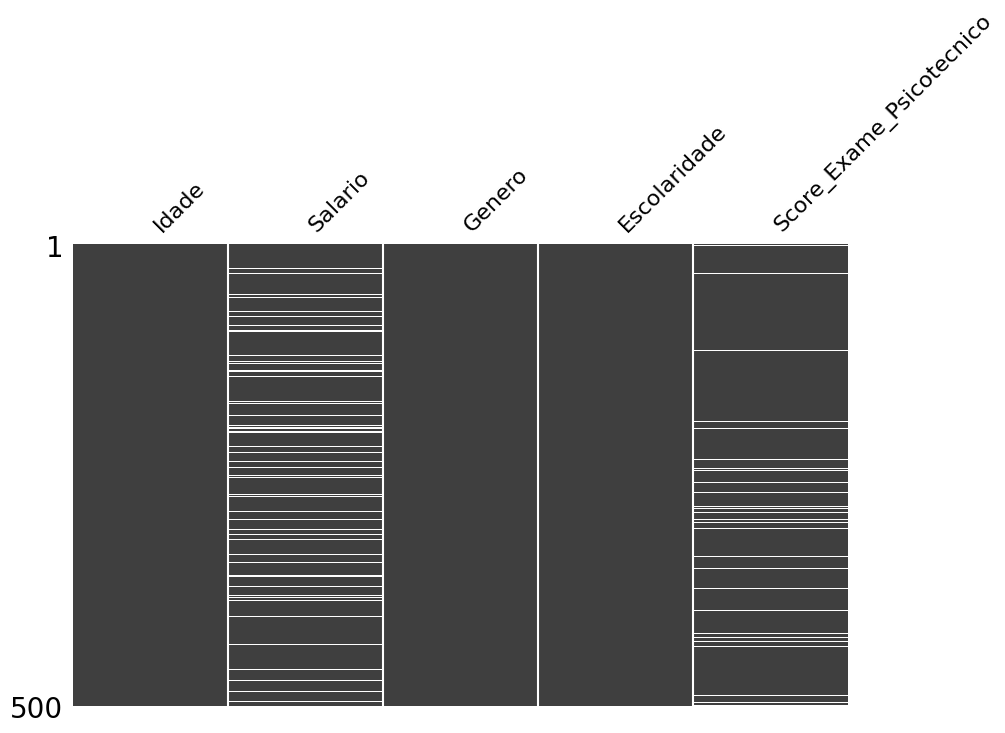

In [42]:
# Mapa de valores ausentes
msno.matrix(dados, figsize = (10, 6), sparkline = False)
plt.show()

Neste gr√°fico, a presen√ßa de dados √© representada por barras escuras e os valores ausentes s√£o representados por espa√ßos em branco. O lado direito do gr√°fico fornece um gr√°fico de barras que indica a quantidade total de valores presentes para cada vari√°vel.



In [43]:
# Usamos o m√©todo isna() para verificar valores ausentes em cada coluna
valores_ausentes = dados.isna().sum()

In [44]:
print(valores_ausentes)

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [45]:
print(dados.isnull().sum())

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [46]:
# Calcular a porcentagem de valores ausentes em cada coluna
porcentagem_ausentes = (dados.isna().mean() * 100)

In [47]:
print(porcentagem_ausentes)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


In [48]:
print(dados.isnull().mean() *100)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


In [49]:
dados['Salario']

0      30404.959339
1      20886.502401
2      15959.388748
3      28534.995327
4      10553.176215
           ...     
495             NaN
496    28798.952240
497    34903.903628
498    18669.610773
499    33295.900396
Name: Salario, Length: 500, dtype: float64

### Estrat√©gias de Tratamento de Valores Ausentes

Quando voc√™ tem uma vari√°vel com valores ausentes, como nesse caso em que a vari√°vel "salario" tem 10% de valores ausentes, existem v√°rias estrat√©gias que voc√™ pode considerar para lidar com esses valores ausentes. A escolha da estrat√©gia depende do contexto dos seus dados e do objetivo da an√°lise. Algumas das estrat√©gias comuns incluem:

**Remo√ß√£o de linhas**: Voc√™ pode optar por remover as linhas que cont√™m valores ausentes na coluna "salario". Isso √© apropriado se a quantidade de dados faltantes for pequena em rela√ß√£o ao tamanho total do conjunto de dados e se a remo√ß√£o n√£o introduzir vi√©s nos seus resultados. No entanto, essa estrat√©gia pode levar √† perda de informa√ß√µes.

**Preenchimento com um valor padr√£o**: Dependendo do contexto, voc√™ pode optar por preencher os valores ausentes com um valor padr√£o, como a m√©dia, a mediana ou um valor espec√≠fico. Isso pode ser apropriado se voc√™ acredita que os valores ausentes n√£o s√£o cr√≠ticos e que um valor padr√£o n√£o afetar√° significativamente a an√°lise.

**Preenchimento com base em outras vari√°veis**: √Äs vezes, voc√™ pode usar informa√ß√µes de outras vari√°veis do dataset para preencher os valores ausentes de "salario". Por exemplo, voc√™ pode preencher com a m√©dia dos sal√°rios de pessoas com a mesma escolaridade ou o mesmo g√™nero.

**Modelo de previs√£o**: Se a vari√°vel "salario" for importante e os valores ausentes n√£o puderem ser facilmente preenchidos com m√©dias ou valores padr√£o, voc√™ pode criar um modelo preditivo para estimar os valores ausentes com base em outras vari√°veis relevantes. Isso √© mais complexo, mas pode ser uma abordagem poderosa se voc√™ tiver dados suficientes e a vari√°vel "salario" for fundamental para sua an√°lise.

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

### Teste de Normalidade Para Decidir a Estrat√©gia de Tratamento de Valores Ausentes

Para preencher os valores ausentes com a m√©dia devemos verificar se a vari√°vel segue uma distribui√ß√£o normal. Se a vari√°vel seguir uma distribui√ß√£o normal, podemos usar a m√©dia ou a mediana. Caso contr√°rio devemos usar a mediana.

In [50]:
# Extraia a coluna "salario" em uma s√©rie
salario = dados['Salario']

In [51]:
salario

0      30404.959339
1      20886.502401
2      15959.388748
3      28534.995327
4      10553.176215
           ...     
495             NaN
496    28798.952240
497    34903.903628
498    18669.610773
499    33295.900396
Name: Salario, Length: 500, dtype: float64

In [52]:
print(salario.isna().sum())  # Conta quantos NaN existem
print((salario == float('inf')).sum())  # Conta quantos valores infinitos existem


53
0


In [53]:
salario = dados['Salario'].dropna()

In [54]:
print(f"Tamanho da amostra ap√≥s remo√ß√£o de NaN: {len(salario)}")
print(f"N√∫mero de valores √∫nicos: {salario.nunique()}")


Tamanho da amostra ap√≥s remo√ß√£o de NaN: 447
N√∫mero de valores √∫nicos: 447


In [55]:
from scipy import stats
# Aplique o teste de Shapiro-Wilk #teste estatistico e verifica se segue uma distribui√ß√£o normal ou n√£o
stat, p_valor = stats.shapiro(salario)

# Imprima o resultado do teste
print(f"Estat√≠stica de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hip√≥tese nula com base no p-valor
alfa = 0.05  # N√≠vel de signific√¢ncia
if p_valor > alfa:
    print("N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula (os dados parecem seguir uma distribui√ß√£o normal).")
else:
    print("A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).")

Estat√≠stica de teste: 0.9898423327626026
Valor-p: 0.003491280335381917
A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).


In [56]:
from scipy.stats import kstest

# Teste de Kolmogorov-Smirnov para normalidade
stat, p_valor = kstest(salario, 'norm', args=(salario.mean(), salario.std()))

print(f"Estat√≠stica de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Decis√£o baseada no p-valor
alfa = 0.05  # N√≠vel de signific√¢ncia
if p_valor > alfa:
    print("N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula (os dados parecem seguir uma distribui√ß√£o normal).")
else:
    print("A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).")


Estat√≠stica de teste: 0.04230721616751176
Valor-p: 0.3896075975317923
N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula (os dados parecem seguir uma distribui√ß√£o normal).


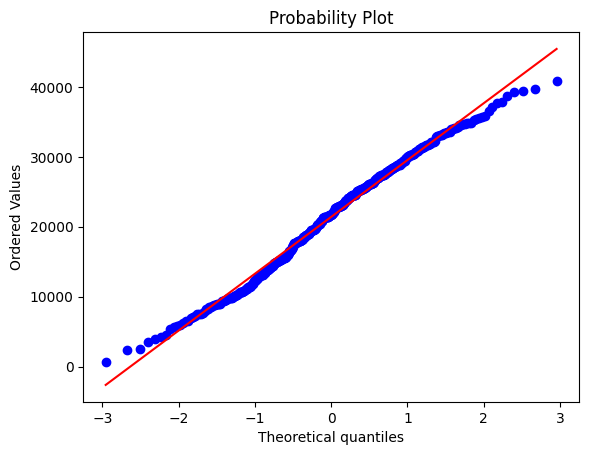

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(salario, dist="norm", plot=plt)
plt.show()


> Podemos ent√£o usar a m√©dia e preencher os valores ausentes. Essa t√©cnica √© chamada de imputa√ß√£o.

### Imputa√ß√£o Para Tratamento de Valores Ausentes

In [58]:
# Calculamos a m√©dia da vari√°vel "Salario" (ignorando os valores ausentes)
media_salario = dados['Salario'].mean()

In [59]:
media_salario

21410.76123606553

In [60]:
# Preenchemos os valores ausentes em "salario" com a m√©dia
dados['Salario'].fillna(media_salario, inplace = True)

In [61]:
# Usamos o m√©todo isna() para verificar valores ausentes em cada coluna
valores_ausentes = dados.isna().sum()
print(valores_ausentes)

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [62]:
from scipy import stats

# Extraia a coluna "salario" em uma s√©rie
score_exame = dados['Score_Exame_Psicotecnico']

# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(score_exame)

# Imprima o resultado do teste
print(f"Estat√≠stica de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hip√≥tese nula com base no p-valor
alfa = 0.05  # N√≠vel de signific√¢ncia
if p_valor > alfa:
    print("N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula (os dados parecem seguir uma distribui√ß√£o normal).")
else:
    print("A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).")

Estat√≠stica de teste: nan
Valor-p: nan
A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).


In [65]:
from scipy.stats import kstest

# Teste de Kolmogorov-Smirnov para normalidade
stat, p_valor = kstest(score_exame, 'norm', args=(score_exame.mean(), score_exame.std()))

print(f"Estat√≠stica de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Decis√£o baseada no p-valor
alfa = 0.05  # N√≠vel de signific√¢ncia
if p_valor > alfa:
    print("N√£o h√° evid√™ncias para rejeitar a hip√≥tese nula (os dados parecem seguir uma distribui√ß√£o normal).")
else:
    print("A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).")


Estat√≠stica de teste: nan
Valor-p: nan
A hip√≥tese nula √© rejeitada (os dados n√£o seguem uma distribui√ß√£o normal).


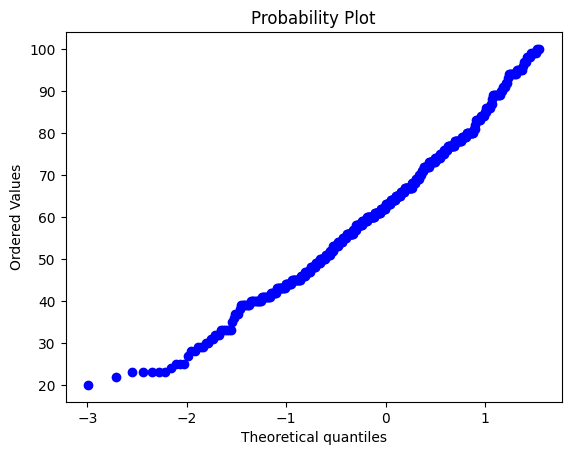

In [66]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(score_exame, dist="norm", plot=plt)
plt.show()

> Podemos ent√£o usar a m√©dia e preencher os valores ausentes. Essa t√©cnica √© chamada de imputa√ß√£o.

In [68]:
# Calculamos a m√©dia da vari√°vel "Salario" (ignorando os valores ausentes)
media_score = dados['Score_Exame_Psicotecnico'].mean()

In [69]:
# Preenchemos os valores ausentes em "salario" com a m√©dia
dados['Score_Exame_Psicotecnico'].fillna(media_score, inplace = True)

In [71]:
# Usamos o m√©todo isna() para verificar valores ausentes em cada coluna
valores_ausentes = dados.isna().sum()
print(valores_ausentes)

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64


> Vimos que h√° correla√ß√£o entre Idade e Sal√°rio. Mas se mudarmos a vari√°vel Idade para Faixa_Etaria, essa rela√ß√£o se confirma?

### Teste Estat√≠stico de Rela√ß√£o Entre Vari√°vel Quantitativa e Qualitativa

In [72]:
dados.head()

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico
0     58  30404.959339  Masculino        M√©dio                 56.000000
1     48  20886.502401   Feminino        M√©dio                 61.565957
2     34  15959.388748  Masculino        M√©dio                 57.000000
3     62  28534.995327      Outro     Superior                 68.000000
4     27  10553.176215      Outro  Fundamental                 44.000000

In [73]:
dados.describe()

Idade       Salario  Score_Exame_Psicotecnico
count  500.000000    500.000000                500.000000
mean    42.848000  21410.761236                 61.565957
std     13.189725   7679.078722                 17.123356
min     20.000000    641.777499                 20.000000
25%     31.750000  15888.869745                 49.000000
50%     44.000000  21410.761236                 61.565957
75%     54.000000  26728.884199                 73.250000
max     65.000000  40845.107626                100.000000

In [74]:
just_compare = pd.read_csv("dataset.csv")

In [75]:
just_compare.describe()

Idade       Salario  Score_Exame_Psicotecnico
count  500.000000    450.000000                470.000000
mean    42.848000  21252.781137                 61.565957
std     13.189725   8322.933018                 17.662523
min     20.000000  -3254.849042                 20.000000
25%     31.750000  15139.019963                 48.000000
50%     44.000000  21681.102602                 61.000000
75%     54.000000  27379.540314                 74.000000
max     65.000000  40845.107626                100.000000

In [76]:
# Definimos as faixas et√°rias desejadas em ordem crescente
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]  

In [77]:
# Definimos os r√≥tulos para as faixas et√°rias
rotulos_faixas = ["Menos de 25", "25-34", "35-44", "45-54", "55 ou mais"]

In [78]:
# Usamos a fun√ß√£o pd.cut() para criar a vari√°vel de faixa et√°ria
dados['Faixa_Etaria'] = pd.cut(dados['Idade'], bins = faixas_etarias, labels = rotulos_faixas)

In [80]:
dados.head()

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico  \
0     58  30404.959339  Masculino        M√©dio                 56.000000   
1     48  20886.502401   Feminino        M√©dio                 61.565957   
2     34  15959.388748  Masculino        M√©dio                 57.000000   
3     62  28534.995327      Outro     Superior                 68.000000   
4     27  10553.176215      Outro  Fundamental                 44.000000   

  Faixa_Etaria  
0   55 ou mais  
1        45-54  
2        25-34  
3   55 ou mais  
4        25-34

In [81]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  500 non-null    float64 
 5   Faixa_Etaria              500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [82]:
# Usamos o m√©todo drop() para remover a vari√°vel "idade"
dados.drop('Idade', axis = 1, inplace = True)

In [83]:
dados.head()

Salario     Genero Escolaridade  Score_Exame_Psicotecnico Faixa_Etaria
0  30404.959339  Masculino        M√©dio                 56.000000   55 ou mais
1  20886.502401   Feminino        M√©dio                 61.565957        45-54
2  15959.388748  Masculino        M√©dio                 57.000000        25-34
3  28534.995327      Outro     Superior                 68.000000   55 ou mais
4  10553.176215      Outro  Fundamental                 44.000000        25-34

In [84]:
# Arredondamos as colunas "Salario" e "Score_Exame_Psicotecnico" para inteiros
dados['Salario'] = dados['Salario'].round().astype(int)
dados['Score_Exame_Psicotecnico'] = dados['Score_Exame_Psicotecnico'].round().astype(int)

In [86]:
dados.head()

Salario     Genero Escolaridade  Score_Exame_Psicotecnico Faixa_Etaria
0    30405  Masculino        M√©dio                        56   55 ou mais
1    20887   Feminino        M√©dio                        62        45-54
2    15959  Masculino        M√©dio                        57        25-34
3    28535      Outro     Superior                        68   55 ou mais
4    10553      Outro  Fundamental                        44        25-34

In [87]:
dados.describe()

Salario  Score_Exame_Psicotecnico
count    500.00000                500.000000
mean   21410.79200                 61.592000
std     7679.06567                 17.123667
min      642.00000                 20.000000
25%    15888.75000                 49.000000
50%    21411.00000                 62.000000
75%    26729.00000                 73.250000
max    40845.00000                100.000000

In [88]:
# M√©dia de sal√°rio por faixa et√°ria #para cada faixa etaria estou calculando a media
media_salario_por_faixa_etaria = dados.groupby('Faixa_Etaria')['Salario'].mean()
media_salario_por_faixa_etaria

C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_19772\1773967023.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salario_por_faixa_etaria = dados.groupby('Faixa_Etaria')['Salario'].mean()


Faixa_Etaria
Menos de 25    13108.633803
25-34          14945.184783
35-44          20980.654545
45-54          24736.491935
55 ou mais     29364.359223
Name: Salario, dtype: float64

In [89]:
# Mediana de sal√°rio por faixa et√°ria
mediana_salario_por_faixa_etaria = dados.groupby('Faixa_Etaria')['Salario'].median()
mediana_salario_por_faixa_etaria

C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_19772\171605719.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_salario_por_faixa_etaria = dados.groupby('Faixa_Etaria')['Salario'].median()


Faixa_Etaria
Menos de 25    12433.0
25-34          15387.5
35-44          21411.0
45-54          24283.0
55 ou mais     29345.0
Name: Salario, dtype: float64

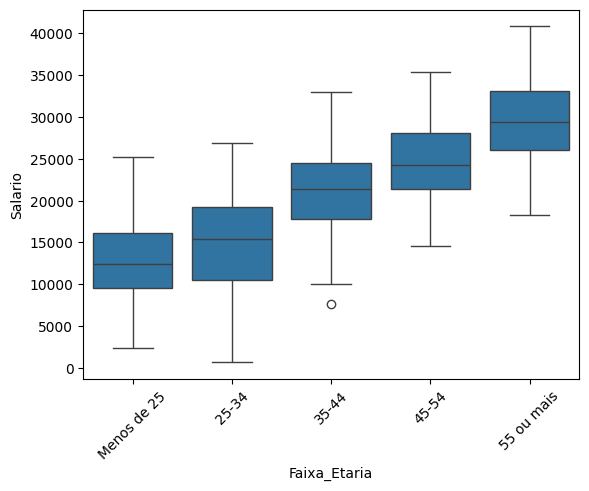

In [91]:
# Boxplots
sns.boxplot(x = 'Faixa_Etaria', y = 'Salario', data = dados)
plt.xticks(rotation = 45)
plt.show()

In [92]:
# Teste ANOVA

# Import
import scipy.stats as stats

# Realize um teste de ANOVA para verificar as diferen√ßas nas m√©dias
resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in dados.groupby('Faixa_Etaria')])

# Verifique o resultado do teste
if resultado_anova.pvalue < 0.05:
    print("H√° evid√™ncias de diferen√ßas significativas nas m√©dias de sal√°rio entre as faixas et√°rias.")
else:
    print("N√£o h√° evid√™ncias de diferen√ßas significativas nas m√©dias de sal√°rio entre as faixas et√°rias.")

H√° evid√™ncias de diferen√ßas significativas nas m√©dias de sal√°rio entre as faixas et√°rias.


C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_19772\2335395571.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in dados.groupby('Faixa_Etaria')])


> Sim, a rela√ß√£o realmente existe entre idade e sal√°rio.

## Relat√≥rio Final

Com base em nossa an√°lise observamos que:

- A vari√°vel Salario apresentava valores negativos. Como n√£o temos mais detalhes sobre isso, decidimos converter de valor negativo para valor ausente.
- As vari√°veis Salario e Score_Exame_Psicotecnico apresentavam problemas de valores ausentes.
- Tratamos os valores ausentes com a imputa√ß√£o da m√©dia pois as duas vari√°veis seguem uma distribui√ß√£o normal.
- Identificamos que n√£o h√° rela√ß√£o entre as vari√°veis g√™nero e escolaridade, ou seja, elas s√£o independentes.
- Verificamos que h√° rela√ß√£o entre idade e sal√°rio, independente do valor individual da idade ou de faixa et√°ria.
- Nossas conclus√µes e decis√µes foram baseadas em testes estat√≠sticos.

In [ ]:
%watermark -a "Data Science Academy"

In [ ]:
#%watermark

In [ ]:
#%watermark --iversions

In [ ]:
///////////////////////////// NEW ////////////////////

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [4]:
new_data = pd.read_csv("dataset.csv")

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [9]:
print(new_data.isnull().sum())

Idade                        0
Salario                     50
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [7]:
new_data[new_data['Salario'] < 0]

Idade      Salario     Genero Escolaridade  Score_Exame_Psicotecnico
94      20  -619.478622  Masculino        M√©dio                      58.0
358     21 -2984.433215  Masculino        M√©dio                      43.0
380     20 -3254.849042      Outro        M√©dio                      50.0

In [10]:
new_data['Salario'] = new_data['Salario'].apply(lambda x: x if x >= 0 else None)

In [11]:
new_data[new_data['Salario'] < 0]

Empty DataFrame
Columns: [Idade, Salario, Genero, Escolaridade, Score_Exame_Psicotecnico]
Index: []

In [12]:
print(new_data.isnull().sum())

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [13]:
media_salario = new_data['Salario'].mean()

In [ ]:
new_data['Salario'].fillna(media_salario, inplace = True)

In [15]:
print(new_data.isnull().sum())

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [16]:
media_score = new_data['Score_Exame_Psicotecnico'].median()

In [ ]:
new_data['Score_Exame_Psicotecnico'].fillna(media_score, inplace = True)

In [18]:
print(new_data.isnull().sum())

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64


In [19]:
new_data.sample(10)

Idade       Salario    Genero Escolaridade  Score_Exame_Psicotecnico
149     64  25099.492709     Outro        M√©dio                      59.0
162     25  12186.604514  Feminino     Superior                      72.0
90      44  32949.014666     Outro        M√©dio                      50.0
484     46  21410.761236     Outro        M√©dio                      64.0
72      34  19596.732571  Feminino        M√©dio                      49.0
492     56  28888.505005  Feminino        M√©dio                      43.0
120     59  21410.761236     Outro        M√©dio                      76.0
184     56  20424.044689  Feminino        M√©dio                      63.0
273     52  21410.761236  Feminino        M√©dio                      61.0
177     60  28895.152002     Outro        M√©dio                      45.0

In [21]:
# Definimos as faixas et√°rias desejadas em ordem crescente
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]  

In [22]:
 #Definimos os r√≥tulos para as faixas et√°rias
rotulos_faixas = ["Menos de 25", "25-34", "35-44", "45-54", "55 ou mais"]

In [23]:
# Usamos a fun√ß√£o pd.cut() para criar a vari√°vel de faixa et√°ria
new_data['Faixa_Etaria'] = pd.cut(new_data['Idade'], bins = faixas_etarias, labels = rotulos_faixas)

In [24]:
new_data.sample(10)

Idade       Salario     Genero Escolaridade  Score_Exame_Psicotecnico  \
17      21  11086.636917   Feminino        M√©dio                      78.0   
30      61  32120.831762      Outro        M√©dio                      61.0   
443     31  10608.136112      Outro        M√©dio                      72.0   
320     47  14606.398755  Masculino     Superior                      80.0   
12      55  23355.024945  Masculino        M√©dio                      71.0   
164     47  18571.369768      Outro     Superior                      65.0   
160     61  27930.665413   Feminino        M√©dio                      49.0   
58      23   4259.578293  Masculino  Fundamental                      56.0   
478     35  17325.057548   Feminino     Superior                      95.0   
2       34  15959.388748  Masculino        M√©dio                      57.0   

    Faixa_Etaria  
17   Menos de 25  
30    55 ou mais  
443        25-34  
320        45-54  
12         45-54  
164        45-54  
160   55 ou mais  
58   Menos de 25  
478        25-34  
2          25-34

In [ ]:
new_data.info()

In [ ]:
sns.boxplot(
    x = 'Faixa_Etaria', 
    y = 'Salario', 
    data = new_data, 
    palette='Set2', 
    hue ='Faixa_Etaria', 
    legend=False)
plt.show()

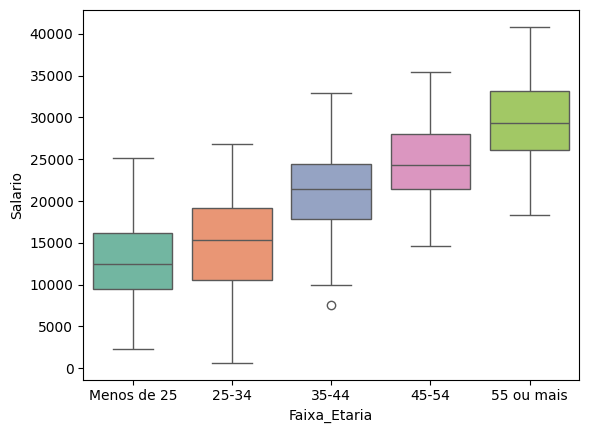

In [59]:
# Boxplots
#FROM matplotlib

sns.boxplot(
    x = 'Faixa_Etaria', 
    y = 'Salario', 
    data = new_data, 
    palette='Set2', 
    hue ='Faixa_Etaria', 
    legend=False)
plt.show()




In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  500 non-null    float64 
 5   Faixa_Etaria              500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [26]:
sce = new_data['Score_Exame_Psicotecnico']

In [27]:
see_salario = new_data['Salario']

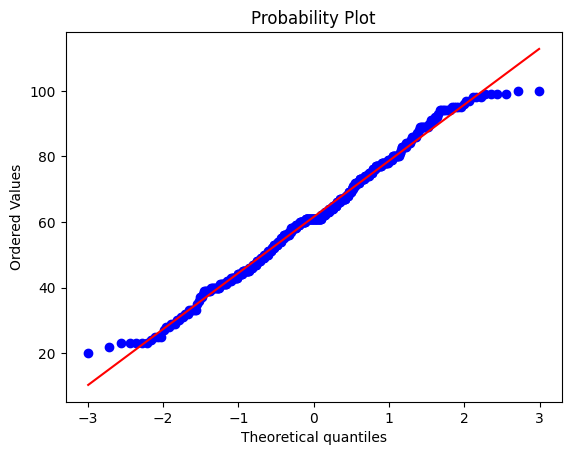

In [34]:
#FROM Matplotlib
stats.probplot(sce, dist="norm", plot=plt)
plt.show()

In [29]:
correlation = new_data[  ['Idade', 'Salario', 'Score_Exame_Psicotecnico']  ].corr()

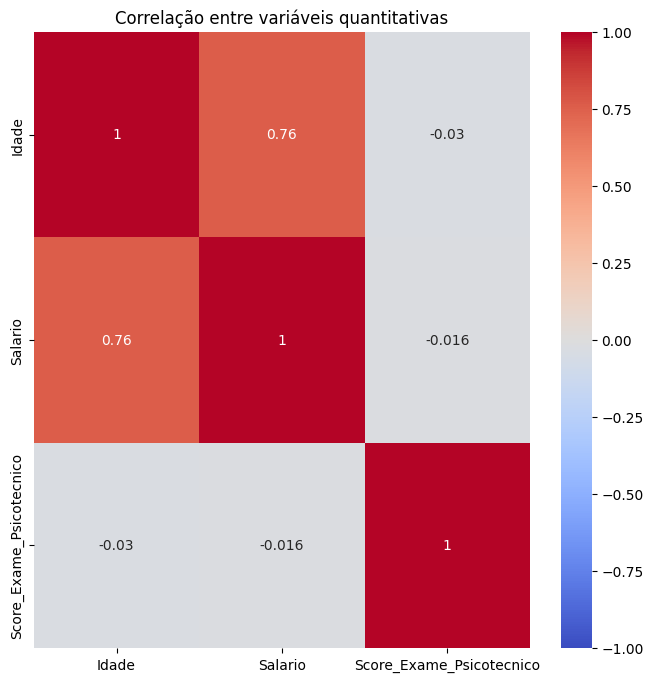

In [35]:
# Visualizando a matriz de correla√ß√£o com um heatmap
#FROM SEABORN

plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correla√ß√£o entre vari√°veis quantitativas')
plt.show()

In [ ]:
"""
Exploring Data with Python üìä

Today, I spent some time exploring the same dataset using boxplot visualization but with different parameters! üéØ

Changing colors, orientations, and whisker lengths, I learned more about how Python helps us visualize statistical concepts like 
quartiles, medians, and outliers. 
It‚Äôs amazing how small tweaks can reveal new insights and deepen our understanding of the data.

Python + Seaborn =  üöÄ

#Python #DataScience #Boxplot #Statistics #LearningByDoing #Seaborn #DataVisualization
https://seaborn.pydata.org/generated/seaborn.boxplot.html
"""

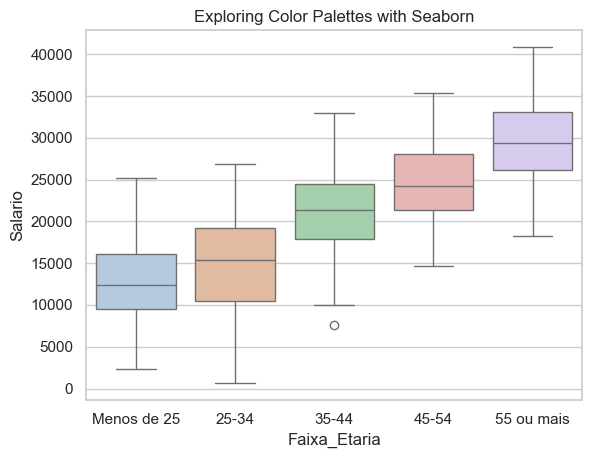

In [95]:
# Color Palette Example
plt.title("Exploring Color Palettes with Seaborn")
sns.boxplot(x='Faixa_Etaria', y='Salario', data=new_data, palette='pastel', saturation=0.5, hue='Faixa_Etaria', legend=False)
plt.show()

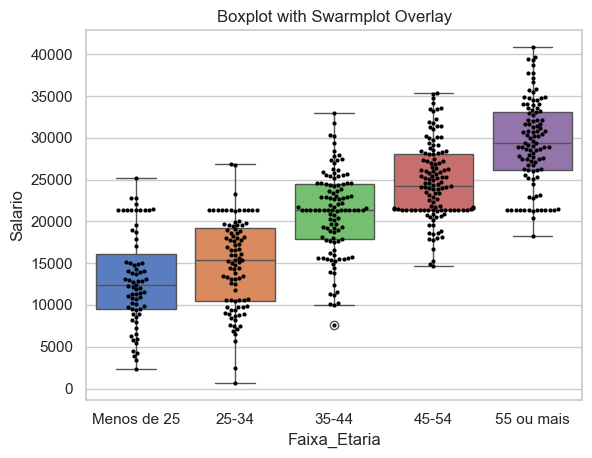

In [97]:
# Boxplot with Swarmplot
plt.title("Boxplot with Swarmplot Overlay")
sns.boxplot(x='Faixa_Etaria', y='Salario', data=new_data, palette='muted', hue='Faixa_Etaria', legend=False)
sns.swarmplot(x='Faixa_Etaria', y='Salario', data=new_data, color='black', size=3)
plt.show()

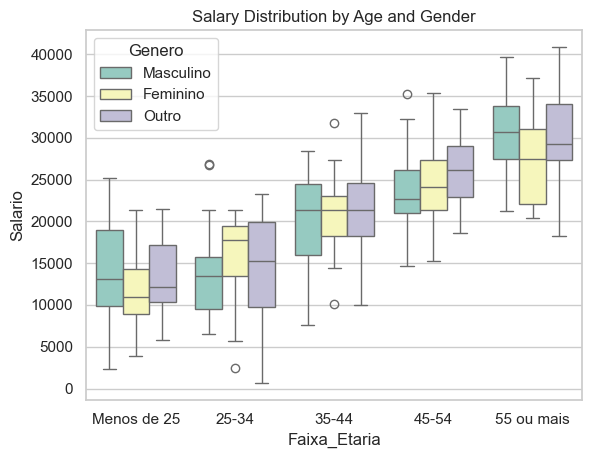

In [98]:
# Grouped Boxplot with Hue
plt.title("Salary Distribution by Age and Gender")
sns.boxplot(x='Faixa_Etaria', y='Salario', hue='Genero', data=new_data, palette='Set3')
plt.show()

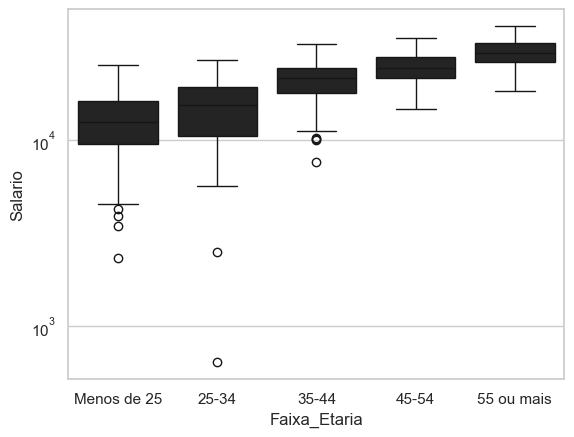

In [103]:
# Boxplot with Log Scale
# Boxplots
sns.boxplot(x = 'Faixa_Etaria', y = 'Salario', data = new_data, log_scale=True)
plt.show()

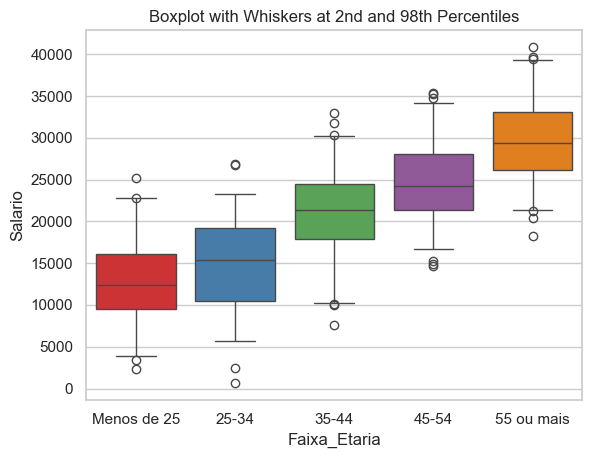

In [104]:
# Boxplot with Custom Whiskers
plt.title("Boxplot with Whiskers at 2nd and 98th Percentiles")
sns.boxplot(x='Faixa_Etaria', y='Salario', data=new_data, whis=[2, 98], palette='Set1', hue='Faixa_Etaria', legend=False)
plt.show()

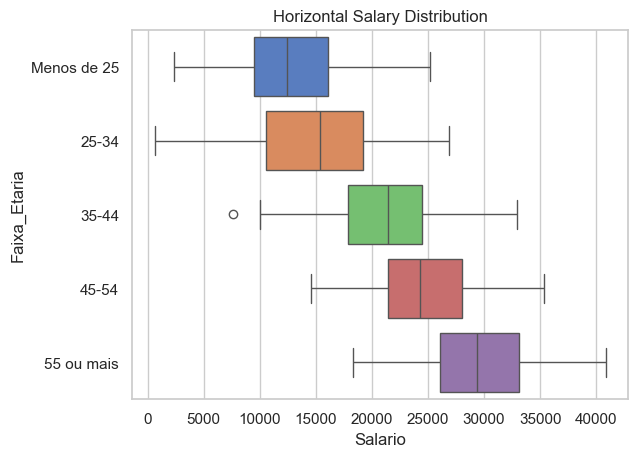

In [105]:
#Flip the orientation to get a different perspective.
plt.title("Horizontal Salary Distribution")
sns.boxplot(x='Salario', y='Faixa_Etaria', data=new_data, orient='h', palette='muted', hue='Faixa_Etaria', legend=False)
plt.show()


# Fim